## Business Understanding

Proyek ini bertujuan untuk mengatasi tantangan yang dihadapi oleh perusahaan pinjaman (lending company) dalam mengelola risiko kredit. Saat ini, ada tiga masalah utama yang perlu diselesaikan:

1. Tingginya Default Rate: Proporsi peminjam yang gagal membayar utang mereka. Ini menyebabkan kerugian finansial yang signifikan bagi perusahaan.
2. Proses Evaluasi yang Inefisien: Proses peninjauan permohonan pinjaman mungkin masih manual atau mengandalkan aturan yang kaku (rule-based), yang bisa lambat, inkonsisten, dan tidak akurat.
3. Potensi Kehilangan Pelanggan: Penolakan pinjaman yang tidak akurat dapat menyebabkan perusahaan kehilangan pelanggan potensial yang sebenarnya memiliki profil risiko rendah.

Tujuan utama proyek ini adalah untuk menyediakan solusi berbasis data yang dapat:

1. Mengidentifikasi dan memitigasi risiko kredit secara akurat.
2. Mengotomatisasi dan mempercepat proses evaluasi pinjaman.
3. Mengoptimalkan keputusan pinjaman, mengurangi default dan meningkatkan jumlah pinjaman yang disetujui secara sehat.

## Analytic Approach

Berdasarkan tujuan bisnis, pendekatan analitis yang paling sesuai adalah klasifikasi prediktif. Tujuannya adalah untuk mengklasifikasikan setiap permohonan pinjaman ke dalam salah satu dari dua kategori utama: risiko tinggi (high-risk) atau risiko rendah (low-risk).

Kandidat Solusi Data Science:
1. Model Prediksi Risiko Kredit (Credit Risk Prediction Model)
    - Bertujuan untuk membangun model klasifikasi biner yang dapat memprediksi probabilitas gagal bayar.
    -Target Variabel: Variabel biner yang menunjukkan status pinjaman (0 = lunas/masih menyicil/telat bayar (masih dalam batas toleransi), 1 = telat bayar (melewati batas toleransi)/gagal bayar).
    - Algoritma yang Potensial:
        - Logistic Regression: Model dasar yang mudah diinterpretasi, cocok untuk baseline dan dapat memberikan probabilitas.
        - Gradient Boosting (misalnya XGBoost, LightGBM): Algoritma yang sangat kuat dan seringkali memberikan performa tinggi untuk masalah klasifikasi, cocok untuk data yang kompleks.
        - Random Forest: Menggunakan banyak pohon keputusan untuk meningkatkan akurasi dan stabilitas.
        - Neural Network: Meskipun lebih kompleks, dapat menangani pola yang non-linear dan jumlah fitur yang besar.

2. Sistem Peringkat Kredit Otomatis (Automated Credit Scoring System)
    - Setelah model prediksi dibangun, kita dapat mengembangkan sistem scoring yang mengaitkan probabilitas risiko dengan skor kredit.
    - Tujuan: Memberikan skor numerik (misalnya 1-100) kepada setiap pemohon, di mana skor yang lebih tinggi menunjukkan risiko yang lebih rendah.
    - Manfaat: Skor ini lebih mudah digunakan oleh tim kredit untuk membuat keputusan, daripada hanya melihat probabilitas.

3. Visualisasi Faktor Risiko Utama
    -   Solusi ini berfokus pada interpretasi model. Membangun visualisasi yang menunjukkan fitur-fitur apa saja yang paling memengaruhi keputusan model.
    - Tujuan: Menjelaskan kepada klien mengapa model membuat prediksi tertentu.
    - Manfaat: Memberikan wawasan (insights) yang dapat digunakan tim bisnis untuk memahami profil peminjam berisiko tinggi dan rendah. Misalnya, "Peminjam dengan riwayat keterlambatan pembayaran di 3 bulan terakhir memiliki risiko gagal bayar 5x lebih tinggi."

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [44]:
df = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\jayaw\AppData\Local\Temp\ipykernel_18676\1028708547.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


## Data Understanding

Pada tahap ini, kita perlu mengetahui beberapa hal mengenai dataset yang telah diperoleh. Hal- hal ini meliputi sample dataset, dimensi dataset, dan atribut-atribut dataset beserta tipe data-nya

In [45]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(466285, 75)

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [7]:
df.dtypes

Unnamed: 0            int64
id                    int64
member_id             int64
loan_amnt             int64
funded_amnt           int64
                     ...   
all_util            float64
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
Length: 75, dtype: object

In [42]:
# Check duplicated rows
df[df.duplicated()]

,loan_amnt,term,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,revol_util_missing,issue_d_month,credit_age,months_since_last_payment


In [ ]:
# Check missing values
df.isna().sum()

loan_amnt                      0
term                           0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
loan_status                    0
pymnt_plan                     0
purpose                        0
title                          0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_rec_prncp                0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
last_pymnt_amnt                0
collections_12_mths_ex_med     0
mths_since

## Data Preparation

Tahap ini diperlukan agar dataset yang telah diperoleh dapat digunakan secara optimal oleh model-model Machine Learning pada saat pelatihan model. Pada tahap ini, dilakukan:
1. Penghapusan data duplikat
2. Penghapusan kolom yang berisi nilai tunggal / nilai null saja
3. Penghapusan kolom-kolom yang tidak relevan
4. Penghapusan kategori yang tidak relevan
5. Perbaikan data yang tidak konsisten (contoh: "business" dan "Business")
6. Menangani nilai hilang (missing values)
7. Encoding
8. Feature Engineering / Feature Extraction

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m


In [9]:
# Check columns with a single value
single_value_cols = [col for col in df.columns if df[col].nunique() == 1]
single_value_cols

['policy_code', 'application_type']

In [10]:
# Remove columns with a single value
df.drop(columns=single_value_cols, inplace=True)

In [11]:
# Drop columns contain missing value only
missing_only = df.columns[df.isna().all()].tolist()
df.drop(columns=missing_only, inplace=True)

In [12]:
# Drop irrelevant columns or values
irrelevant_cols = [
    'Unnamed: 0',
    'id',
    'member_id',
    'url',
    'desc',
    'grade',
    'zip_code',
    'addr_state',
    'next_pymnt_d'
]
df.drop(columns=irrelevant_cols, inplace=True, errors='ignore')

# Drop unwanted categories
df = df[~df["loan_status"].str.contains("Does not meet the credit policy")]

In [13]:
# Fixing inconsistent data problems
df['emp_title'] = df['emp_title'].apply(lambda x: str(x).title())
df['title'] = df['title'].apply(lambda x: str(x).title())

In [14]:
df.isna().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
sub_grade                           0
emp_title                           0
emp_length                      20974
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
purpose                             0
title                               0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_last_delinq         249152
mths_since_last_record         401758
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util  

In [15]:
# Handle missing values

# emp_length
df['emp_length'] = df['emp_length'].replace('nan', np.nan)
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])

# mths_since_last_delinq
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(-1)

# mths_since_last_record
df['mths_since_last_record'] = df['mths_since_last_record'].fillna(-1)

# revol_util
df['revol_util_missing'] = df['revol_util'].isna().astype(int)
df['revol_util'] = df['revol_util'].fillna(0)

# collections_12_mths_ex_med
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(0)

# mths_since_last_major_derog
df['mths_since_last_major_derog'] = df['mths_since_last_major_derog'].fillna(999)

# tot_coll_amt
df['tot_coll_amt'] = df['tot_coll_amt'].fillna(0)

# tot_cur_bal
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(df['tot_cur_bal'].median())

# total_rev_hi_lim
df['total_rev_hi_lim'] = df['total_rev_hi_lim'].fillna(0)



In [16]:
# Encoding

# term
mapper = {
    ' 36 months': 0,
    ' 60 months': 1
}

df['term'] = df['term'].replace(mapper)

# sub_grade
df["sub_grade"] = df["sub_grade"].astype("category").cat.set_categories(
    sorted(df["sub_grade"].unique())
).cat.codes

# emp_length
mapper = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

df['emp_length'] = df['emp_length'].map(mapper)

# home_ownership
mapper = {
    "RENT": 0,
    "MORTGAGE": 1,
    "OWN": 2,
    "OTHER": 3,
    "NONE": 4,
    "ANY": 5
}

df["home_ownership"] = df["home_ownership"].map(mapper)

# verification_status
mapper = {
    "Not Verified": 0,
    "Source Verified": 1,
    "Verified": 2
}

df["verification_status"] = df["verification_status"].map(mapper)

# loan_status
# 0 = good, 1 = bad
mapper = {
    "Fully Paid": 0,
    "Current": 0,
    "In Grace Period": 0,
    "Charged Off": 1,
    "Default": 1,
    "Late (16-30 days)": 1,
    "Late (31-120 days)": 1,
}

df["loan_status"] = df["loan_status"].map(mapper)

# pymnt_plan
mapper = {'n': 0, 'y': 1}
df['pymnt_plan'] = df['pymnt_plan'].map(mapper)

# initial_list_status
mapper = {'f': 0, 'w': 1}
df['initial_list_status'] = df['initial_list_status'].map(mapper)

# Rest of the columns
cols_to_encode = ['emp_title', 'purpose', 'title']
label_encoders = {}
for col in cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le   # save encoder if you need to inverse_transform later

C:\Users\jayaw\AppData\Local\Temp\ipykernel_18676\2827118455.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['term'] = df['term'].replace(mapper)


In [17]:
# Feature engineering

# issue_d
df["issue_d"] = pd.to_datetime(df["issue_d"], format="%b-%y")
df["issue_d_year"] = df["issue_d"].dt.year
df["issue_d_month"] = df["issue_d"].dt.month
min_date = df["issue_d"].min()
df["months_since_issue"] = (df["issue_d"].dt.year - min_date.year) * 12 + (df["issue_d"].dt.month - min_date.month)
df.drop('issue_d', axis=1, inplace=True)

# earliest_cr_line
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y', errors='coerce')
today = datetime.today()
df['credit_age'] = (today.year - df['earliest_cr_line'].dt.year) * 12 + (today.month - df['earliest_cr_line'].dt.month)
df['credit_age'] = df['credit_age'] / 12  # dalam satuan tahun
df.drop('earliest_cr_line', axis=1, inplace=True)

# last_pymnt_d
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y', errors='coerce')
df['months_since_last_payment'] = (
    (pd.to_datetime("today") - df['last_pymnt_d']) / np.timedelta64(1, 'm')
)
df['months_since_last_payment'] = df['months_since_last_payment'].fillna(-1)
df.drop('last_pymnt_d', axis=1, inplace=True)

# last_credit_pull_d
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y', errors='coerce')
df['months_since_last_credit_pull'] = (
    (pd.to_datetime("today") - df['last_credit_pull_d']) / np.timedelta64(1, "m")
)
df['months_since_last_credit_pull'] = df['months_since_last_credit_pull'].fillna(-1)
df.drop('last_credit_pull_d', axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

Tahap ini diperlukan untuk mengidentifikasi distribusi, outlier, dan pola pada data. Informasi yang diperoleh dapat membantu kita dalam melatih model Machine Learning. Pada tahap ini dilakukan visualisasi univariate analysis dalam bentuk histogram dan boxplot. Histogram digunakan untuk mengidentifikasi distribusi dari setiap fitur di dalam dataset. Dan Boxplot digunakan untuk mengidentifikasi distribusi beserta outliers pada masing- masing fitur. Selain itu, terdapat visualisasi heatmap untuk menampilkan matriks korelasi antar fitur. Analisis korelasi ini dapat digunakan untuk menemukan dan mengatasi adanya multicollienarity yang mungkin terdapat pada dataset.

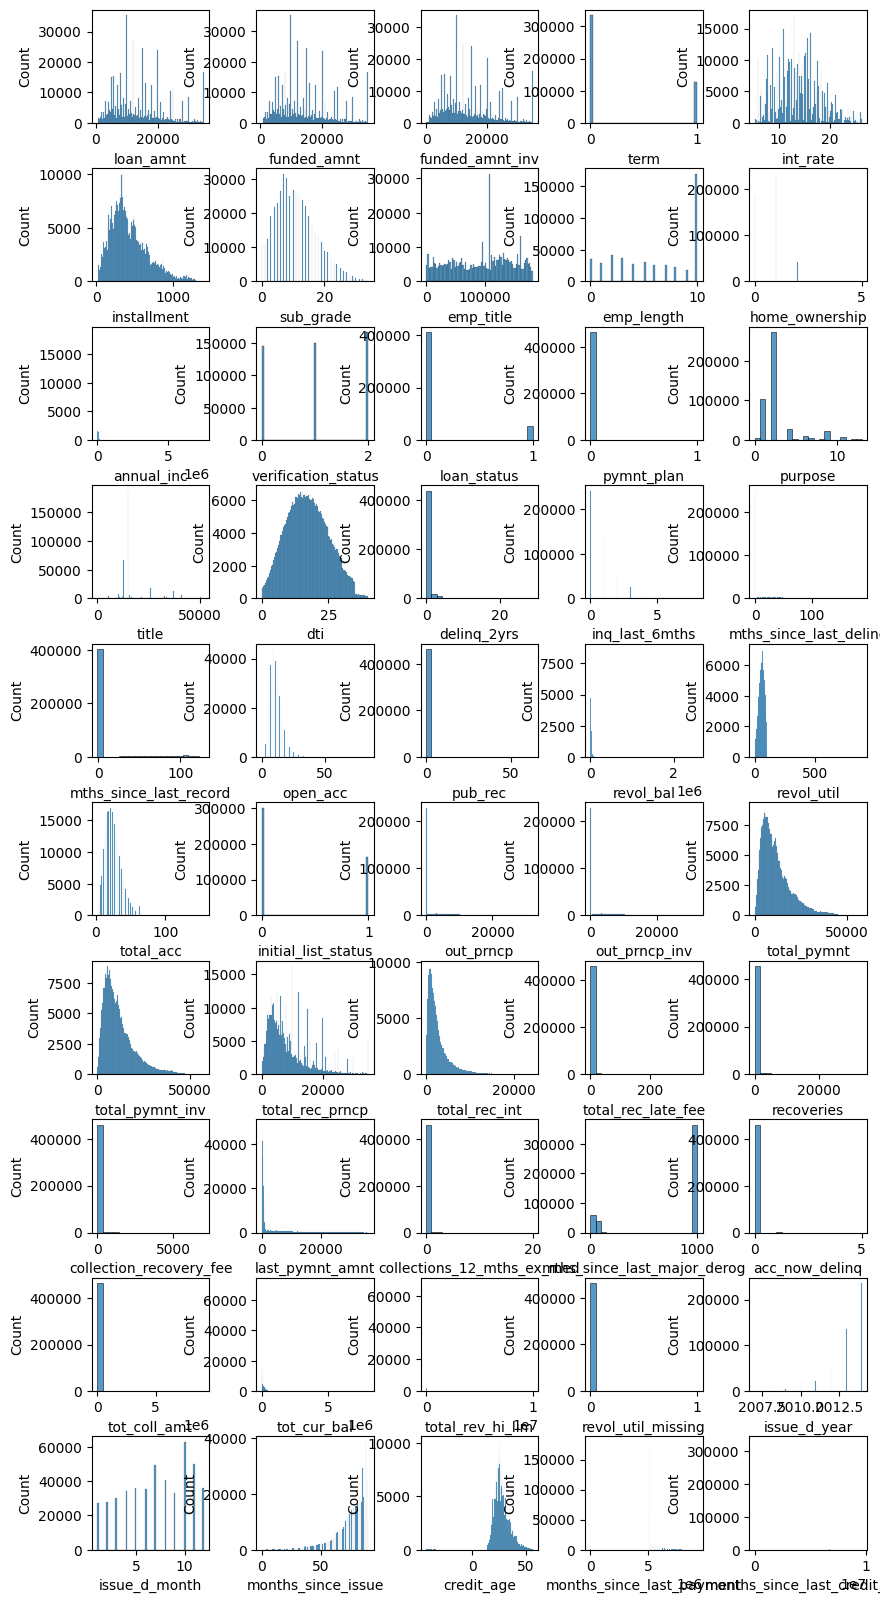

In [18]:
fig = plt.figure(figsize=(10, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(0, len(df.columns)):
    ax = fig.add_subplot(10, 5, i+1)
    sns.histplot(df[df.columns[i]])
    plt.xlabel(df.columns[i])

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float

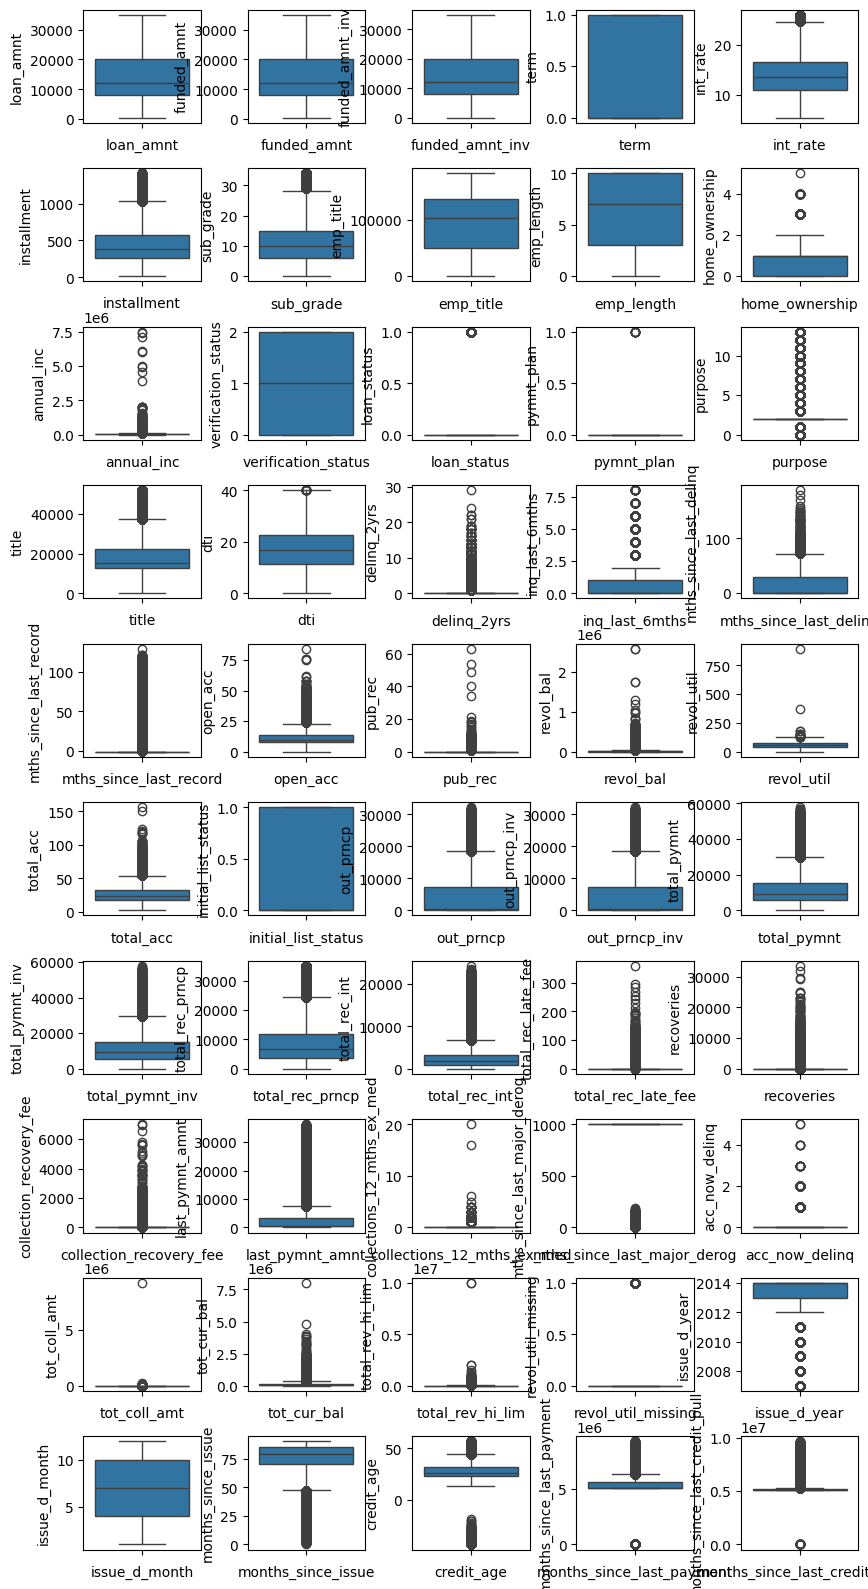

In [19]:
fig = plt.figure(figsize=(10, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(0, len(df.columns)):
    ax = fig.add_subplot(10, 5, i+1)
    sns.boxplot(df[df.columns[i]])
    plt.xlabel(df.columns[i])

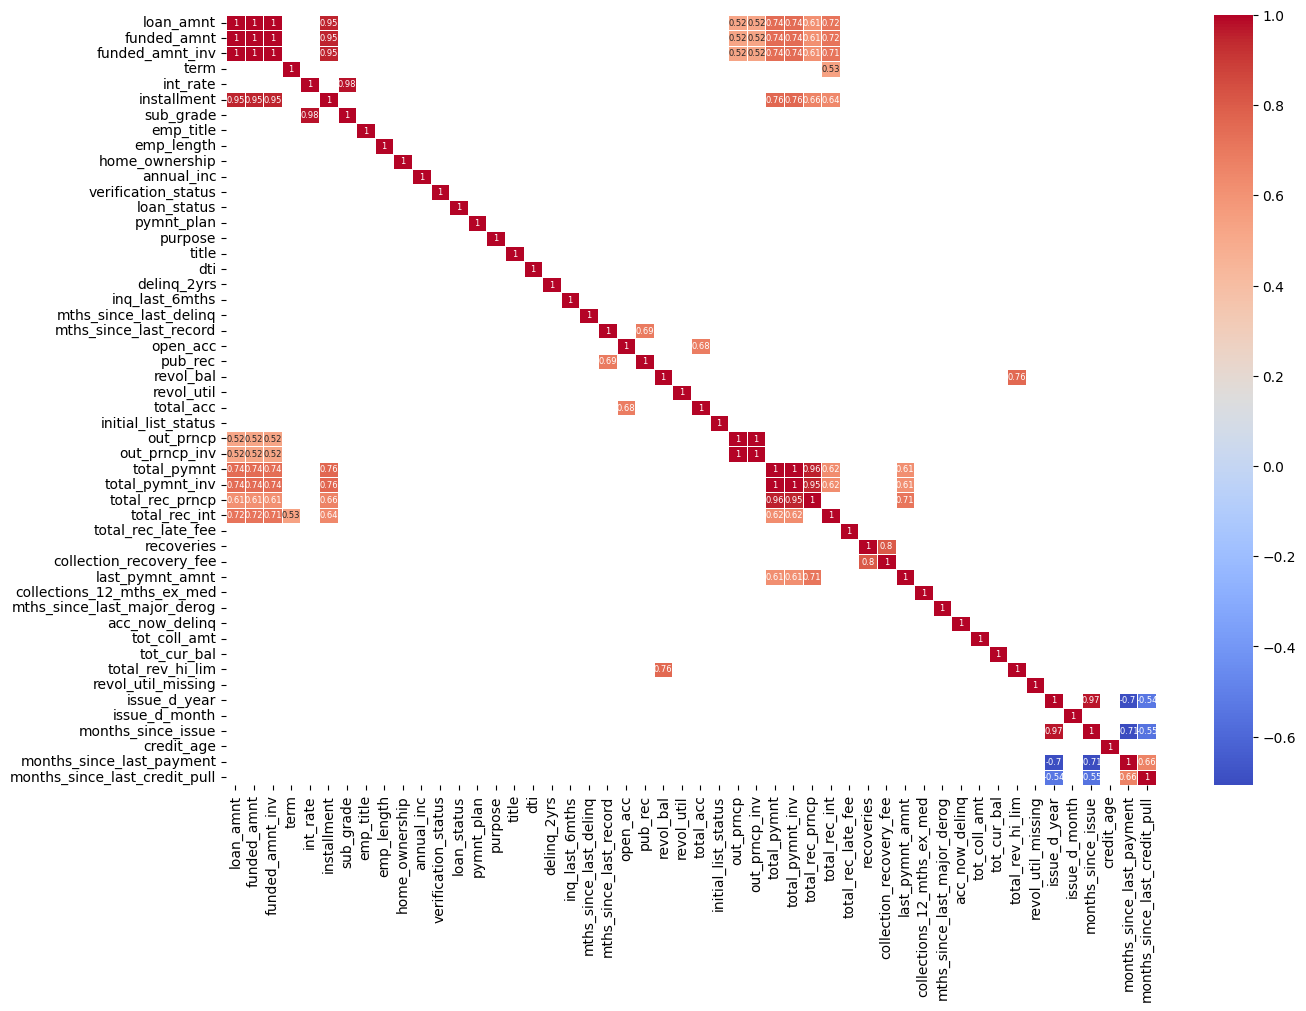

In [21]:
corr = df.corr()
strong_corr = corr[(corr >= 0.5) | (corr <= -0.5)]

plt.figure(figsize=(15, 10))
sns.heatmap(strong_corr, annot=True, cmap="coolwarm", linewidths=0.5, annot_kws={"size": 6})
plt.show()

## Feature Selection

Pada tahap ini, dilakukan penghapusan kolom- kolom yang bersifat multicollinearity

In [22]:
cols_to_remove = [
    'funded_amnt',
    'funded_amnt_inv',
    'installment',
    'int_rate',
    'pub_rec',
    'open_acc',
    'total_pymnt_inv',
    'total_rec_int',
    'total_rev_hi_lim',
    'issue_d_year',
    'months_since_issue',
    'months_since_last_credit_pull'
]

In [23]:
df.drop(cols_to_remove, axis=1, inplace=True)

## Train Test Split

Pada tahap ini, dilakukan train-test split dengan perbandingan data latih sebesar 80% dan data uji sebesar 20%

In [24]:
RANDOM_STATE = 42

In [25]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

## Model Building

Pada tahap ini, dilakukan pelatihan pada beberapa model Machine Learning seperti Logisitc Regression, Gaussian Naive Bayes, dan Random Forest. Algoritma- algoritma ini dipilih berdasarkan kecepatan pelatihan dan performa. Proses pelatihan pada masing- masing model dilakukan dengan menggunakan hyperparameter tuning, hal ini dilakukan untuk meningkatkan performa model.

In [26]:
TARGET = 'loan_status'
train_records = []

In [27]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

### Logisitc Regression

In [ ]:
logistic = LogisticRegression(random_state=RANDOM_STATE)
param_grid = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}
rand_cv = RandomizedSearchCV(logistic,param_distributions=param_grid,cv=skf,
                            scoring='recall',error_score='raise', random_state=RANDOM_STATE)
rand_cv.fit(X_train,y_train)
train_records.append(('Logistic Regression',rand_cv.best_score_,
                    rand_cv.best_params_, rand_cv.best_estimator_))

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_

### Support Vector Machines (SVM)

In [29]:
# svm = SVC(probability=True, random_state=RANDOM_STATE)
# param_grid = {}
# rand_cv_svm = RandomizedSearchCV(
#     svm,
#     param_distributions=param_grid,
#     cv=skf,
#     scoring='recall',
#     error_score='raise',
#     random_state=RANDOM_STATE,
#     n_iter=10
# )
# rand_cv_svm.fit(X_train, y_train)
# train_records.append((
#     'SVM',
#     rand_cv_svm.best_score_,
#     rand_cv_svm.best_params_,
#     rand_cv_svm.best_estimator_
# ))


### Naive Bayes

In [ ]:
nb = GaussianNB()
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5,
                    1e-4, 1e-3, 1e-2, 1e-1, 1]
}
rand_cv_nb = RandomizedSearchCV(
    nb, param_distributions=param_grid, cv=skf, scoring='recall', error_score='raise',
    random_state=RANDOM_STATE,
    n_iter=10
)
rand_cv_nb.fit(X_train, y_train)
train_records.append(('Naive Bayes', rand_cv_nb.best_score_, rand_cv_nb.best_params_,
                    rand_cv_nb.best_estimator_))


### K-Nearest Neighbors (KNN)

In [31]:
# knn = KNeighborsClassifier()
# param_grid = {
#     'n_neighbors': [3, 5, 7],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan']
# }
# rand_cv_knn = RandomizedSearchCV(
#     knn,
#     param_distributions=param_grid,
#     cv=skf,
#     scoring='recall',
#     error_score='raise',
#     random_state=RANDOM_STATE,
#     n_iter=10
# )
# rand_cv_knn.fit(X_train, y_train)
# train_records.append((
#     'KNN',
#     rand_cv_knn.best_score_,
#     rand_cv_knn.best_params_,
#     rand_cv_knn.best_estimator_
# ))


### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=RANDOM_STATE)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [20],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
rand_cv_rf = RandomizedSearchCV(
    rf, param_distributions=param_grid, cv=skf, scoring='recall', error_score='raise', random_state=RANDOM_STATE,
    n_iter=10
)
rand_cv_rf.fit(X_train, y_train)
train_records.append(('Random Forest', rand_cv_rf.best_score_, rand_cv_rf.best_params_,
    rand_cv_rf.best_estimator_))


## Training Results

Berikut ini adalah summary dari proses pelatihan yang telah dilakukan. Summary ini meliputi nama model, parameter terbaik pada masing- masing model, dan score terbaik pada proses pelatihan

In [36]:
train_records_df = pd.DataFrame(train_records, columns=['model_name','score','params', 'model'])
train_records_df = train_records_df.sort_values(by='score',ascending=False)

In [37]:
train_records_df

,model_name,score,params,model
2,Random Forest,0.931454,"{'n_estimators': 50, 'min_samples_leaf': 1, 'm...","(DecisionTreeClassifier(max_depth=20, max_feat..."
1,Naive Bayes,0.862153,{'var_smoothing': 1e-06},GaussianNB(var_smoothing=1e-06)
0,Logistic Regression,0.754254,"{'penalty': 'l2', 'C': 10}","LogisticRegression(C=10, random_state=42)"


## Model Evaluation

Pada tahap ini, model dengan performa terbaik diuji pada data pengujian / testing data yang telah disiapkan sebelumnya. Pengujian akan menampilkan akurasi, recall, precision, F1-Score, confusion matrix, dan classification report secara keseluruhan

In [38]:
best_model = train_records_df.iloc[0]['model']

y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9924386244984251
Recall: 0.9336898395721925
Precision: 0.9980253585533153
F1 Score: 0.9647862560908224

Confusion Matrix:
 [[82404    19]
 [  682  9603]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     82423
           1       1.00      0.93      0.96     10285

    accuracy                           0.99     92708
   macro avg       0.99      0.97      0.98     92708
weighted avg       0.99      0.99      0.99     92708



In [40]:
importances = best_model.feature_importances_
feature_names = X.columns

# Create a DataFrame of feature importances
feature_importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)


In [41]:
feature_importances_df

,feature,importance
25,recoveries,0.192610
26,collection_recovery_fee,0.152781
36,months_since_last_payment,0.135769
23,total_rec_prncp,0.134886
0,loan_amnt,0.089587
27,last_pymnt_amnt,0.079341
22,total_pymnt,0.049528
21,out_prncp_inv,0.044124
20,out_prncp,0.035364
24,total_rec_late_fee,0.011479
